## Beispieldaten

In [25]:
proc_email_data = catalog.load("proc_email_data")
print(proc_email_data.shape)
proc_email_data.head()

[02/14/24 15:27:28] INFO     Loading data from proc_email_data (CSVDataset)...                  ]8;id=828478;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=872095;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py#483\483]8;;\

(5000, 3)


,name,top_folder,message
0,shackleton-s,sent,Message-ID: <21013688.1075844564560.JavaMail.e...
1,farmer-d,logistics,Message-ID: <22688499.1075854130303.JavaMail.e...
2,parks-j,deleted_items,Message-ID: <27817771.1075841359502.JavaMail.e...
3,stokley-c,chris_stokley,Message-ID: <10695160.1075858510449.JavaMail.e...
4,germany-c,all_documents,Message-ID: <27819143.1075853689038.JavaMail.e...


In [1]:
pipelines


{'__default__': Pipeline([
Node(read_mails, 'emails', 'email_data', 'read_mails_node'),
Node(sample_data, ['email_data', 'params:sampling'], 'sampled_data', 'sample_data_node'),
Node(process_email_folders, 'sampled_data', 'proc_email_data', 'process_email_folders_node'),
Node(tfidf_transform, ['proc_email_data', 'params:tfidf'], ['X_tfidf', 'tfidf'], 'tfidf_node'),
Node(lsa, ['X_tfidf'], ['X_lsa', 'lsa'], 'lsa_node'),
Node(kmeans_clustering, ['X_lsa', 'params:kmeans'], ['cluster_info', 'kmeans'], 'kmeans_node'),
Node(tsne_transform, ['X_lsa', 'params:tsne'], 'X_tsne', 'tsne_node'),
Node(top_terms_per_cluster, ['tfidf', 'lsa', 'kmeans', 'params:kmeans'], None, 'cluster_report_node')
]), 'data_science': Pipeline([
Node(tfidf_transform, ['proc_email_data', 'params:tfidf'], ['X_tfidf', 'tfidf'], 'tfidf_node'),
Node(lsa, ['X_tfidf'], ['X_lsa', 'lsa'], 'lsa_node'),
Node(kmeans_clustering, ['X_lsa', 'params:kmeans'], ['cluster_info', 'kmeans'], 'kmeans_node'),
Node(tsne_transform, ['X_lsa', 

## Vergleich von Raw, Replacement und Redaction
### Datenverarbeitung über TFIDF und TSNE
### TFIDF: Term-frequency times inverse document-frequency
### TSNE: T-distributed Stochastic Neighbor Embedding

In [18]:
import seaborn as sns
import pandas as pd

In [22]:
X_tsne = catalog.load("X_tsne")
cluster_labels = catalog.load("cluster_labels")

[02/14/24 01:44:02] INFO     Loading data from X_tsne (CSVDataset)...                           ]8;id=237830;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=691437;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py#483\483]8;;\

                    INFO     Loading data from cluster_labels (CSVDataset)...                   ]8;id=923551;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=631495;file:///Users/mako6/Library/Caches/pypoetry/virtualenvs/texts-lxIErqf9-py3.11/lib/python3.11/site-packages/kedro/io/data_catalog.py#483\483]8;;\

In [23]:
plotting_data = pd.merge(X_tsne, cluster_labels, left_index=True, right_index=True, )
plotting_data.rename(columns={"0_x": "X", "1": "Y", "0_y": "label"}, inplace=True)


<Axes: xlabel='X', ylabel='Y'>

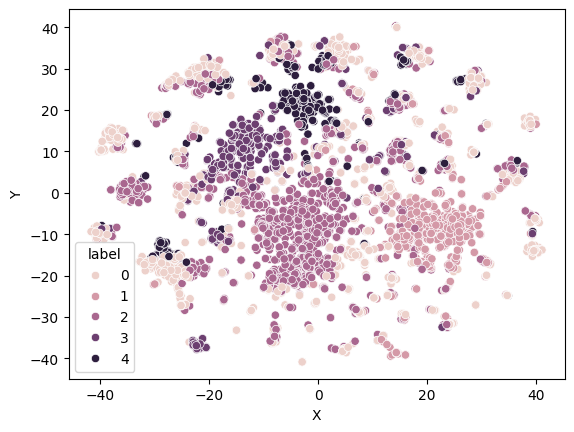

In [24]:
sns.scatterplot(data=plotting_data, x="X", y="Y", hue="label", )

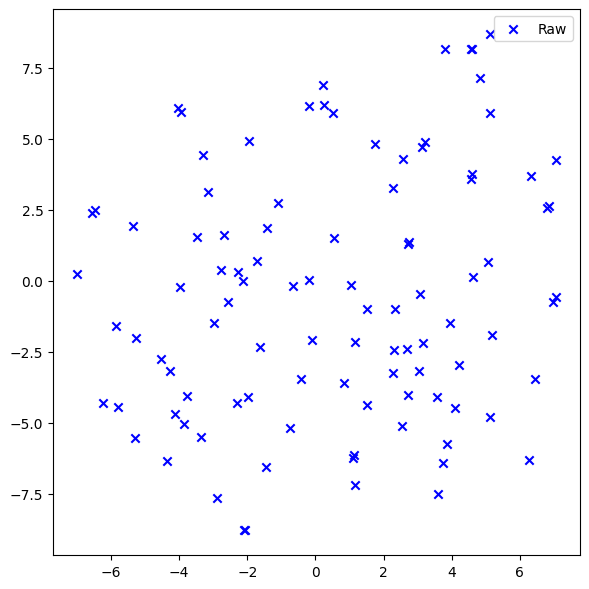

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(
        figsize=(6, 6),
        tight_layout=True,
    )
ax.scatter(X_tsne["0"].values, X_tsne["1"].values, c="b", marker="x", label="Raw")
ax.legend()